In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

 - https://stackoverflow.com/questions/63637144/python-rayleigh-fit-histogram?noredirect=1#comment112546840_63637144
 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rayleigh.html

In [2]:
X = stats.rayleigh(loc=10, scale=5)

In [3]:
x0 = X.rvs(size=10000, random_state=123)

In [4]:
xl = np.linspace(x0.min(), x0.max(), 100)

In [5]:
loc, scale = stats.rayleigh.fit(x0)
loc, scale

(9.990726961181025, 4.9743913760956335)

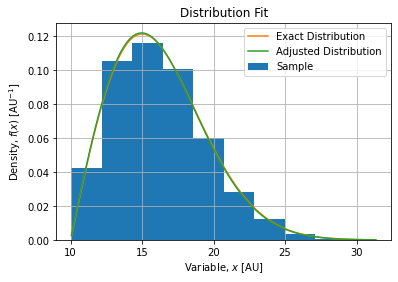

In [6]:
fig, axe = plt.subplots()
axe.hist(x0, density=1, label="Sample")
axe.plot(xl, X.pdf(xl), label="Exact Distribution")
axe.plot(xl, stats.rayleigh(scale=scale, loc=loc).pdf(xl), label="Adjusted Distribution")
axe.set_title("Distribution Fit")
axe.set_xlabel("Variable, $x$ $[\mathrm{AU}]$")
axe.set_ylabel("Density, $f(x)$ $[\mathrm{AU}^{-1}]$")
axe.legend()
axe.grid()

In [7]:
X = stats.rayleigh(scale=scale, loc=loc)
kst = stats.kstest(x0, X.cdf)
kst

KstestResult(statistic=0.0097140857969642, pvalue=0.3019167138216704)

In [8]:
c, b = np.histogram(x0)
ct = np.diff(X.cdf(b))*np.sum(c)

In [9]:
c2t = stats.chisquare(c, ct, ddof=2)
c2t

Power_divergenceResult(statistic=11.170065854104491, pvalue=0.13137094282775724)

In [10]:
x0 = np.array([13, 15, 13, 14, 12, 13, 12, 14, 15, 12, 11, 10, 11, 15, 18, 11, 11, 11, 13,
               15, 15, 15, 11, 12, 13, 12, 15, 15, 15, 12, 12, 11, 14, 16, 11, 13, 14, 16,
               17, 24, 21, 16, 20, 18, 18, 19, 21, 22, 19, 15, 16, 15, 13, 14, 16, 18, 21,
               19, 22, 14, 13, 14, 15, 14, 17, 19, 17, 16, 18, 12, 15, 17, 17, 16, 17, 16,
               19, 17, 14, 13, 16, 16, 13, 15, 17, 17, 20, 18, 17, 12, 19, 14, 15, 15, 14,
               13, 17, 16, 14, 12, 11, 12, 20, 19, 16, 24, 19, 20, 19, 17, 16, 17, 16, 19,
               22, 17, 16, 20, 22, 21, 22, 20, 14, 18, 16, 19, 20, 17, 20, 22, 20, 22, 19,
               17, 13, 16, 18, 14, 16, 20, 20, 18, 19, 19, 16, 19, 12, 12, 14, 14, 13, 15,
               16, 16, 19, 16, 17, 12, 11, 11, 10, 12, 11, 11, 13, 14, 13, 17, 8, 8, 8, 10,
               10, 10, 14, 16, 11, 9, 9, 11, 10, 17, 13, 15, 19, 15, 13, 16, 17, 14, 12, 13,
               14, 11, 10, 15, 13, 12, 12, 11, 10, 9, 9, 9, 9, 8, 15, 16, 12, 9, 11, 9, 10,
               10, 7, 7, 7, 21, 19, 13, 10, 15, 12, 10, 10, 9, 8, 10, 20, 14, 13, 11, 13, 15,
               14, 10, 11, 12, 16, 17, 15, 12, 13, 16, 15, 13, 14, 17, 14, 13, 15, 13, 11, 14,
               15, 17, 18, 22, 21, 16, 17, 22, 17, 17, 18, 26, 17, 19, 21, 16, 15, 19, 19, 22,
               19, 18, 17, 18, 18, 12, 17, 17, 17, 18, 14, 16, 20, 17, 16, 16, 18, 16, 19, 18,
               18, 20, 18])
p = stats.rayleigh.fit(x0)
X = stats.rayleigh(*p)

In [11]:
kst = stats.kstest(x0, X.cdf)
kst

KstestResult(statistic=0.12701044409231593, pvalue=0.0001232197856051324)

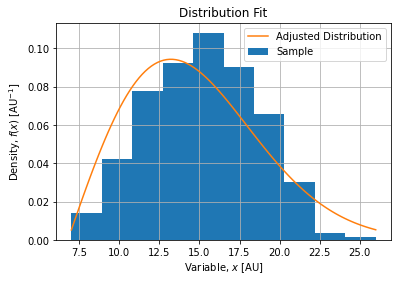

In [12]:
xl = np.linspace(x0.min(), x0.max(), 100)
fig, axe = plt.subplots()
f, b, _ = axe.hist(x0, density=1, label="Sample")
axe.plot(xl, X.pdf(xl), label="Adjusted Distribution")
axe.set_title("Distribution Fit")
axe.set_xlabel("Variable, $x$ $[\mathrm{AU}]$")
axe.set_ylabel("Density, $f(x)$ $[\mathrm{AU}^{-1}]$")
axe.legend()
axe.grid()

In [13]:
c, b = np.histogram(x0)
ct = np.diff(X.cdf(b))*np.sum(c)

In [14]:
c2t = stats.chisquare(c, ct, ddof=2)
c2t

Power_divergenceResult(statistic=31.874916914227434, pvalue=4.284273564311872e-05)